In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data = pd.read_csv('real_estate_price_size.csv')
data

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
5,245050.280,575.19
6,265129.064,570.89
7,175716.480,620.82
8,331101.344,682.26
9,218630.608,694.52


### critical thinking

- **Process**
    - size affects prices
    - prices in rural areas may be flactuated. so sample size is critical
    
   
- **Omitted Variable Bias** : 
    - real estate prices are very complex, so reducing to 1 variable is **questionable**. 
    - any critical _categorical variable_ which effects prediction critically?
- **Critical checkpoints for the predicted function**
    - ....

In [3]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


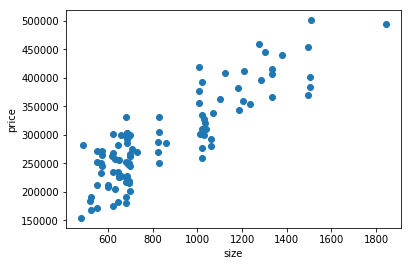

In [4]:
y = data['price']
x1 = data['size']

plt.scatter(x1,y)
plt.xlabel('size')
plt.ylabel('price')
plt.show()

In [6]:
# we need OLS w/ constant **for lineer regression**
x = sm.add_constant(x1)

results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           8.13e-31
Time:                        13:46:20   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### lineer function

y(price) = 101190 + 223.18 * x1(size)

- const.p-value=0 < 0.05, x1(size)'s p-value=0.000 <0.05, so, it is ok for 95% Confidence Interval !

That means price and const are significantly different from zero
- r-square=74%, not bad. We may need more variables
- F-statistic's p-value is very close to zero. We may need more variables
- it seems 3 segments: small-size, medium-size, bigger-sizes. But for bigger-sizes, we have less data, which means for biggre sizes our prediction may not performed well !


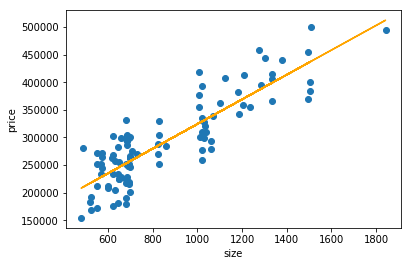

In [8]:
plt.scatter(x1,y)
plt.xlabel('size')
plt.ylabel('price')

yhat = 223.1787 * x1 + 101190

fig = plt.plot(x1, yhat, c='orange')

plt.show()